# Week 7 - Identify Halifax's Twitter influencers
*© 2020 Colin Conrad*

Welcome to Week 6 of INFO 6270! Last week we covered SQL databases. This week we are going to go back to core Python skills and conduct social media data analysis. Though it is no longer hyped, social media analysis remains an important and interesting skill for data scientists to develop. 

**Note:** In this lab you will be required to register for Netlytic. This is a trustworthy site run by Ryerson University in Toronto, Canada. However if you are not comfortable about giving some of your private information to another organization, please do not hesitate to inform your instructor-- an alternative dataset can be provided to you.

**This week, we will achieve the following objectives:**
- Get Twitter data into Python
- Conduct basic natural language processing (NLP)
- Visualize your word frequencies
- Identify Twitter influencers through network analysis

# Case: Affinio
[Affinio](https://www.affinio.com/) is a Halifax-based social media analytics Software as a Service (SaaS) company which offers the ATON marketing insight engine. ATON uses social media data to generate insights about a company's existing customers by identifying information about their activities, interests and opinions and return the insight generated to the company's customer relationship management software (CRM). This helps companies better understand their customer needs.

Though not always advertised, the main feature that makes the ATON algorithm work is its network analysis features. In this lab, we will investigate social media text and network features that similarly generate insights, in our case, about Halifax.

# Objective 1: Get Twitter data into Python
In many ways, Twitter is a great resource for academic researchers because it offers access to large amounts of social data for free. In the recent past, this meant that students would be able able to easily register for a Twitter Developer account using their Twitter login credentials and have instant access to data. However, [starting 2018](https://blog.twitter.com/developer/en_us/topics/tools/2018/new-developer-requirements-to-protect-our-platform.html) Twitter changed its developer account process in an effort to limit spam. Students can still access developer credentials, however you must be manually vetted by Twitter, which makes it difficult to do the lab using the Twitter API. You can still do this if given enough time however, and if interested, consider doing your final project by accessing Twitter data directly in Python using the [Tweepy](https://www.tweepy.org/) library.

Instead, we will use a tool called [Netlytic](https://netlytic.org/) to help us access the data that we are looking for. Netlytic is a free-to-use tool maintained by Dr. Anatoliy Gruzd and Philip Mai at Ryerson University and is designed to help academic-types such as us. A bit of trivia, Anatoliy and Philip used to work at the School of Information Management at Dalhousie. This section will give you a step-by-step guide for conducting your own analysis using Netlytic. I also similarly downloaded a dataset which retrieved the `#Halifax` keyword for reference.

## Step 1: Register for Netlytic
Visit https://netlytic.org/ and Register for an account. If you are not comfortable about using the tool, please inform your instructor; an alternative data set can be provided.

## Step 2: Create a query
Click on `New Dataset` and select `Twitter`. Give your data set a name and conduct a query of a term that is interesting to you. This will collect Tweets that use hashtags or have user names featuring the term.

**Note**: If you are interested in investigating YouTube or Reddit for your final project, you may wish to investigate Netlytic. It supports more than just Twitter!

![alt text](img/7-1.png "Access Netyltic")

## Step 3: Investigate your search results and extract CSV data
When your query is complete, you will be able to visually inspect the Tweets which have been received. Click `export all data to CSV` so that you can retrieve a CSV file of your dataset. Move your CSV file into the `/data` subfolder and be sure to change the file's name to something easy to remember. Open the CSV file data in Excel to look at the results if you would like!

![alt text](img/7-2.png "Access Netyltic")

## Step 4: Load your CSV files
Once you have the Tweets file in hand, you are able to conduct analysis similarly to how we have done in the past few weeks. To Try executing the code below to retrieve the tweets from the `w7_hfx_tweets.csv` data set.

In [1]:
import csv

with open('data/w7_hfx-tweets.csv', newline='') as tweetsfile:
    reader = csv.reader(tweetsfile, delimiter=',')
    for row in reader:
        print(row)

['id', 'guid', 'link', 'pubdate', 'author', 'title', 'description', 'source', 'user_id', 'profile_image_url', 'user_statuses_count', 'user_friends_count', 'user_followers_count', 'user_created_at', 'user_bio', 'user_location', 'lang', 'coords']
['1', 'https://twitter.com/jackaranian/statuses/1233830228306333697', 'https://twitter.com/jackaranian/statuses/1233830228306333697', '2020-02-29 14:03', 'jackaranian', 'RT @millypod1: ðŸ†˜PIXIE #Lost #ScanMe #Tagged  Black Cross Breed Female #Pellon #Halifax #WestYorkshire #HX2 https://t.co/rz0DnPQKSh https://â€¦', 'ðŸ†˜PIXIE #Lost #ScanMe #Tagged  Black Cross Breed Female #Pellon #Halifax #WestYorkshire #HX2 https://t.co/rz0DnPQKSh https://t.co/f9mijKlpy8', 'Twitter Web App', '1020866954', 'https://pbs.twimg.com/profile_images/456395764772528129/8OR88ZSV_normal.jpeg', '83286', '652', '1159', '2012-12-18 18:16', 'Nothing doth more hurt in a state than that cunning men pass for wise. Hate duplicity, liars, opportunists, scammers, users, scoundre

UnicodeDecodeError: 'charmap' codec can't decode byte 0x8f in position 2354: character maps to <undefined>

This code triggers an error. We encountered this error because of an text encoding problem. One challenge of working with Twitter data is that they contain emojis, which are not part of the default encoding used by Python's CSV library. Instead, we have to identify the proper encoding type, which in this case is `utf-8`. Try executing this code instead.

In [4]:
import csv

tweets = []

with open('data/w7_hfx-tweets.csv', newline='', encoding='utf-8') as tweetsfile: # changed to support utf-8 encoding
    reader = csv.reader(tweetsfile, delimiter=',')
    for row in reader:
        tweets.append(row)
        
print(tweets)

[['id', 'guid', 'link', 'pubdate', 'author', 'title', 'description', 'source', 'user_id', 'profile_image_url', 'user_statuses_count', 'user_friends_count', 'user_followers_count', 'user_created_at', 'user_bio', 'user_location', 'lang', 'coords'], ['1', 'https://twitter.com/jackaranian/statuses/1233830228306333697', 'https://twitter.com/jackaranian/statuses/1233830228306333697', '2020-02-29 14:03', 'jackaranian', 'RT @millypod1: 🆘PIXIE #Lost #ScanMe #Tagged  Black Cross Breed Female #Pellon #Halifax #WestYorkshire #HX2 https://t.co/rz0DnPQKSh https://…', '🆘PIXIE #Lost #ScanMe #Tagged  Black Cross Breed Female #Pellon #Halifax #WestYorkshire #HX2 https://t.co/rz0DnPQKSh https://t.co/f9mijKlpy8', 'Twitter Web App', '1020866954', 'https://pbs.twimg.com/profile_images/456395764772528129/8OR88ZSV_normal.jpeg', '83286', '652', '1159', '2012-12-18 18:16', 'Nothing doth more hurt in a state than that cunning men pass for wise. Hate duplicity, liars, opportunists, scammers, users, scoundrels. Pr

Voila! You have extracted the Tweets from the CSV file. You can also investigate the data to recognize that these are expressed as a series of lists. We will come back to these soon.

## *Challenge Question 1 (2 points)*
Using the code above as a foundation, print the number of tweets contained in your CSV file. You should be able to use the `for` loop to detect the number of tweets contained.

In [ ]:
# insert your code here

# Objective 2: Conduct basic natural language processing (NLP)
Now that we have the social media data in an accessible format, we can start conducting analysis on the text data. Within the broad subject of data science, there is a sub-discipline called *natural language processing* (NLP) which investigates computational analysis related to textual data. NLP is an interesting interdisciplineary field that draws on more than just machine learning; it also uses techniques from linguistics (such as semantic structure and grammar) and information management (such as ontologies)! We will not dive too deeply into NLP theory in this course, though that can't stop us from using it to achieve a goal.

To stary, we can investigate some of Netlytic's features. Using Netlytic, we can process counts of keywords in our data set. Let's illustrate the steps taken to generate the `w7_hfx-freqs.csv` file contained in your data folder.

## Get Netlytic to do your text analysis
Netlytic has a `Text Analysis` tab where you can specify the text that you wish to analyze. Select the pale `ANALYZE` button to generate word counts. This is computationally intensive and Netlytic may take some time to finish processing. Once complete, you should have a screen such as that depicted below.

![alt text](img/7-3.png "Access Netyltic")

## Generate a word cloud with Netlytic
Once the file has been processed, you are able to generate a word cloud using this tool. This type of word cloud visualizes terms by their frequency in the data set. In the dataset selected, we can see that `#halifax` dominates the cloud because this was the term that was queried. If you are interested, you should be able to export Netyltic's word counts to a csv file.

![alt text](img/7-4.png "Access Netyltic")

## Conducting NLP with Python ourselves
By now you should know enough to not be too impressed by this feature of Netlytic. Generating word counts such as this using Python is relatively simple. Think about the logic for such a function:
- Create a dictionary for terms
- Loop through each term from every tweet
- If the term does not exist in the dictionary, add it
- If the term does exist in the dictionary, increase its count by one
- When the loop is finished, export it to a CSV file

We could write this function ourselves if we needed to. Still, this would have a few problems. One such problem is that the most common words in English are words such as `the`, `a`, `of`, `and`, `but`. Note that these did not make it into Netlytic's word cloud. In NLP these are often called *stopwords* and are filtered out of a keyword analysis. It would be a pain to filter stopwords, as well as prepare our functions for the nuances of natural language.

The secret to making NLP work in Python is to use the right tools for the job. Python has an excellent library called `NLTK`: the [Natural Language ToolKit](https://www.nltk.org/). NLTK is among Python's most powerful libraries and is (in my opinion) one of the reasons why Python is a preferred tool for data science. NLTK contains methods for conducting tasks such as: 
- sentence grammar computation 
- cluster analysis 
- keyword tagging
- translation

By using NLTK we can incorporate all of these features (and more!) into our analysis. Let's start with something simple though. Let's start by generating a list of keywords similarly to how Netlytic worked. The first step is to transform our tweet sentences into words. In NLP, these are called word tokens. The code below selects uses NLTK's built-in `TweetTokenizer` to identify tokens which are specific to tweets and transform a tweet into said tokens.

In [5]:
import nltk # import the library
from nltk.tokenize import TweetTokenizer # import TweetTokenizer

tokenizer = TweetTokenizer() # import the tokenizer object

tweet_tokens = tokenizer.tokenize(tweets[4][6]) # fourth tweet in our list, 6th column (the tweet text)

print(tweet_tokens)

['20', '-', 'year-old', 'man', 'charged', 'with', 'striking', 'Bedford', 'home', 'with', 'car', 'https://t.co/ibLcIVb1Z7', '#lokol', '#halifax']


Pretty cool! Similarly, if we would like to combine all of the tokens from all of the tweets, we could simply create a master string which contains all of the tweet content. Let's combine all of the tweets into one string. 

In [7]:
combined_tweets_text = "" # create a placeholder string

for t in tweets:
    combined_tweets_text = combined_tweets_text + " " + t[6] # append the tweet content

With the tweets combined we can again run the tokenizer. This will give us a series of keywords.

In [9]:
tweets_tokens = tokenizer.tokenize(combined_tweets_text) # fourth tweet in our list, 6th column (the tweet text)

print(tweets_tokens)

['description', '🆘', 'PIXIE', '#Lost', '#ScanMe', '#Tagged', 'Black', 'Cross', 'Breed', 'Female', '#Pellon', '#Halifax', '#WestYorkshire', '#HX2', 'https://t.co/rz0DnPQKSh', 'https://t.co/f9mijKlpy8', '🆘', 'PIXIE', '#Lost', '#ScanMe', '#Tagged', 'Black', 'Cross', 'Breed', 'Female', '#Pellon', '#Halifax', '#WestYorkshire', '#HX2', 'https://t.co/rz0DnPQKSh', 'https://t.co/f9mijKlpy8', '🆘', 'PIXIE', '#Lost', '#ScanMe', '#Tagged', 'Black', 'Cross', 'Breed', 'Female', '#Pellon', '#Halifax', '#WestYorkshire', '#HX2', 'https://t.co/rz0DnPQKSh', 'https://t.co/f9mijKlpy8', '20', '-', 'year-old', 'man', 'charged', 'with', 'striking', 'Bedford', 'home', 'with', 'car', 'https://t.co/ibLcIVb1Z7', '#lokol', '#halifax', 'More', 'photos', 'from', 'the', '@UPEIWBasketball', 'game', 'in', 'which', 'they', 'won', 'to', 'advance', 'to', '@AUS_SUA', 'final', 'on', 'Sunday', 'at', '1', 'pm', '.', '@SportsGuardian', '(', 'these', 'were', 'some', 'of', 'my', 'better', 'ones', ')', '#Halifax', 'https://t.co/5C

We can now conduct analysis on the tweet content as we would any other list data! For instance, if we wanted to pick out the number of times the word "Bedford" appeared in our tweets, we could write a simple counting script, such as the one below.

In [20]:
# a simple Bedford counter script

num_bedford = 0

for word in tweets_tokens:
    if word == "traffic":
        num_bedford += 1

print(num_bedford)

23


In addition to regular analysis, NLTK comes with some functions to make things easier. For instance, we may wish to analyse the frequency distribution (i.e. the number of times a word appears) of all of the terms in the tweets. For this, we can use the `FreqDist` function. The code below unpacks the 100 most common words in our tweets, just like Netlytic!

In [21]:
fdist1 = nltk.FreqDist(tweets_tokens) # call FreqDist on the tweets_tokens

print(fdist1.most_common(100)) # print the 100 most common terms

[('.', 860), ('#Halifax', 781), (',', 685), ('the', 668), ('to', 661), ('!', 527), ('in', 394), ('a', 374), ('and', 370), ('for', 364), ('\\', 314), ("'", 314), ('of', 304), (':', 256), ('s', 243), ('on', 235), ('is', 219), ('#halifax', 212), ('at', 208), ('-', 206), ('’', 183), ('with', 180), ('this', 169), ('I', 149), ('?', 148), ('you', 145), ('our', 132), ('&', 129), ('are', 129), ('we', 125), ('your', 105), ('that', 103), ('as', 102), ('(', 97), (')', 97), ('it', 95), ('#NovaScotia', 91), ('by', 89), ('The', 88), ('can', 87), ('2020', 84), ('now', 83), ('t', 82), ('an', 81), ('be', 80), ('from', 77), ('March', 75), ('here', 73), ('/', 73), ('Halifax', 70), ('has', 69), ('out', 68), ('will', 67), ('all', 66), ('today', 62), ('about', 61), ('us', 59), ('have', 56), ('re', 55), ('Friday', 54), ('We', 53), ('afternoon', 52), ('or', 51), ('my', 50), ('Canada', 50), ('$', 49), ('been', 48), ('like', 48), ('A', 48), ('"', 48), ('AI', 48), ('Clearview', 47), ('️', 46), ('using', 46), ('2'

## How to clean your tweet stopwords
This is good, though we are still not quite there. The top of our list is dominated by words such as `is` and `a` which are not very informative. In NLP these are referred to as *stop words*, the sort of words that are very common but minimally informative. In order to replicate what Netlytic did, we would need to remove the stop words. There is no magic formula for this one.

This said, NLTK does have some useful resources. NLTK contains more than functions, it also contains many corpora which can be useful to doing natural language tasks. One of these is the `stopwords` corpus, which contains a series of stopwords. Using Python we can create a loop which filters based on whether a keyword matches a word from that corpus.

In order to download an NLTK corpus, you need to use the `nltk.download` function. Execute the code below. An interface will generate.

In [22]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Using the NLTK interface, navigate to the `Corpora` tab and search for the `stopwords` corpus. Download this, similarly to the picture below.

![alt text](img/7-NLTK.png "Download the stopwords corpus")

When downloaded, we can take a look at the content. Execute the line below once it is successfully downloaded to see the stopwords data. For fun, I have set this to demonstrate Arabic stopwords. Consider changing it to `english` to see the English version.

In [26]:
from nltk.corpus import stopwords # import the stopwords corpus

print(stopwords.words('english')) # consider chaning me to English, German, Russian or Greek

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

We can now use the stopwords to clean our Twitter sample to remove the stopwords. Execute the code below to see the `cleaned` data set. 

In [27]:
from nltk.corpus import stopwords
    
cleaned_tokens = [] # placeholder for the new tokens
for t in tweets_tokens:
    if t not in stopwords.words('english'): # check to see if it is in the stopwords corpus. If not, add it.
        cleaned_tokens.append(t) 

print(cleaned_tokens)

['description', '🆘', 'PIXIE', '#Lost', '#ScanMe', '#Tagged', 'Black', 'Cross', 'Breed', 'Female', '#Pellon', '#Halifax', '#WestYorkshire', '#HX2', 'https://t.co/rz0DnPQKSh', 'https://t.co/f9mijKlpy8', '🆘', 'PIXIE', '#Lost', '#ScanMe', '#Tagged', 'Black', 'Cross', 'Breed', 'Female', '#Pellon', '#Halifax', '#WestYorkshire', '#HX2', 'https://t.co/rz0DnPQKSh', 'https://t.co/f9mijKlpy8', '🆘', 'PIXIE', '#Lost', '#ScanMe', '#Tagged', 'Black', 'Cross', 'Breed', 'Female', '#Pellon', '#Halifax', '#WestYorkshire', '#HX2', 'https://t.co/rz0DnPQKSh', 'https://t.co/f9mijKlpy8', '20', '-', 'year-old', 'man', 'charged', 'striking', 'Bedford', 'home', 'car', 'https://t.co/ibLcIVb1Z7', '#lokol', '#halifax', 'More', 'photos', '@UPEIWBasketball', 'game', 'advance', '@AUS_SUA', 'final', 'Sunday', '1', 'pm', '.', '@SportsGuardian', '(', 'better', 'ones', ')', '#Halifax', 'https://t.co/5C8LHHvZFG', '🆘', 'PIXIE', '#Lost', '#ScanMe', '#Tagged', 'Black', 'Cross', 'Breed', 'Female', '#Pellon', '#Halifax', '#West

Finally, let's again create a frequency distribution to see the most common keywords. This is still not perfect, but this is progress!

In [28]:
fdist2 = nltk.FreqDist(cleaned_tokens)

print(fdist2.most_common(100))

[('.', 860), ('#Halifax', 781), (',', 685), ('!', 527), ('\\', 314), ("'", 314), (':', 256), ('#halifax', 212), ('-', 206), ('’', 183), ('I', 149), ('?', 148), ('&', 129), ('(', 97), (')', 97), ('#NovaScotia', 91), ('The', 88), ('2020', 84), ('March', 75), ('/', 73), ('Halifax', 70), ('today', 62), ('us', 59), ('Friday', 54), ('We', 53), ('afternoon', 52), ('Canada', 50), ('$', 49), ('like', 48), ('A', 48), ('"', 48), ('AI', 48), ('Clearview', 47), ('️', 46), ('using', 46), ('2', 44), ('After', 44), ('day', 43), ('28', 42), ('#novascotia', 40), ('*', 39), ('recognition', 39), ('tickets', 38), ('see', 38), ('year', 38), ('News', 38), ('controversial', 38), ('facial', 38), ('Our', 37), ('denials', 37), ('officer', 37), ('#AtlanticCanada', 37), ('...', 36), ('new', 36), ('confirmed', 36), ('multiple', 35), ('Global', 35), ('Regional', 35), ('Police', 35), ('software', 35), ('investigated', 35), ('privacy', 35), ('commissioner', 35), ('https://t.co/OcywhlpnVC', 35), ('#AtlSecCon', 35), ('#

## *Challenge Question 2 (2 points)*
There are two major ways that the stopword solution above can be improved:
1. Some tags are essential identical but are considered different because they contain upper case letters;
2. We have identified stray characters (e.g. `.` and `,`) as keywords.

Modify the script to exclude these characters and to overcoming the casing issue. **Hint** you may wish to consider python's `.lower()` [method to convert all keywords to lowercase](https://www.w3schools.com/python/ref_string_lower.asp).

In [29]:
colin_sentence = "I AM REALLY ANGRYYYY FOR REALZ!"

print(colin_sentence.lower())

i am really angryyyy for realz!


## *Challenge Question 3 (2 points)*
In addition to the Halifax script, you have also likely generated your own tweets generated by a different set of Twitter users. Instead of analyzing Tweets, analyze the most frequent terms contained in the users' Twitter `user_bio`. Your code should do the following:
- Import your csv data (or use the one on COVID-19 provided);
- Create a list of strings that contain profile descriptions instead of tweets
- Filter the stopwords
- Print your frequencies

You do *not* have to filter for repeated profiles in this question. 

### Import your data file

In [ ]:
# insert your code here

### Combine your profiles

In [ ]:
# insert your code here

### Create a processing script

In [ ]:
# insert your code here

# Objective 3: Visualize your word frequencies
So far in this course we have managed data by observing raw datasets. These are only so good in the grand scheme of things-- it is now time to take our first dive into visualization! Though we will explore some of these concepts in more detail later, I would like to now introduce `matplotlib`, one of Python's main visualization libraries. This library allows us to generate graphics relatively quickly using a few lines of code.

Let's start by visualizing word rank vs frequency. As you recall, `fdist2` consists of our frequency distributions from the Halifax tweets dataset. 

In [30]:
fdist2

FreqDist({'.': 860, '#Halifax': 781, ',': 685, '!': 527, '\\': 314, "'": 314, ':': 256, '#halifax': 212, '-': 206, '’': 183, ...})

In their book *Mining the Social Web* (2019) Russell & Klassen point out that a `log scale graph` is helpful for these types of datasets. This type of graph shows the frequency and word rank in log space. This is helpful because some of our terms are much more common than others. Execute the code below to produce a graph of a log space visualization.

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

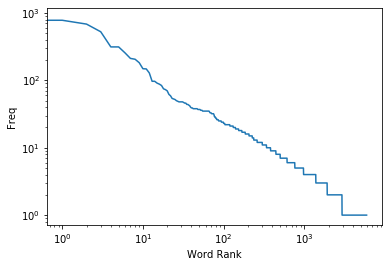

In [31]:
import matplotlib.pyplot as plt # import matplotlib

# the line below for telling matplotlib not to pop out and generate graphs in Jupyter
%matplotlib inline 

counts = sorted(fdist2.values(), reverse=True) # sorted counts from fdist2

plt.loglog(counts) # plot a log space chart
plt.ylabel("Freq") # y axis label
plt.xlabel("Word Rank") # x axis label

plt.figure # call the plot

In addition, we could express word count frequencies as histograms-- graphs used to compare frequencies in statistics. For this, we could consider taking only the 100 most common values. With these we can investigate the distribution of the top keywords (Russell & Klassen, 2019).

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

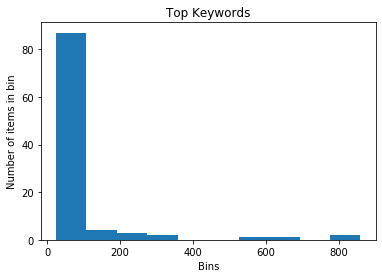

In [33]:
counts = fdist2.most_common(100) # take the 100 most common words

values = [] # this is a list
for c in counts: # get only the values, not the words themselves
    values.append(c[1])

plt.hist(values) # the data to be plotted
plt.title("Top Keywords") # titles and labels, as before
plt.ylabel("Number of items in bin")
plt.xlabel("Bins")

plt.figure # call the plot

We don't need to know too much about what is happening on the backend yet, though this is a useful demonstration of how to visualize our findings.

## *Challenge Question 4 (1 point)*
Similarly to the log scale frquency diagram above, create a log-frequency distribution of your tweets data. 

In [ ]:
# insert your code here

## *Challenge Question 5 (1 point)*
Modify the histogram code above to work with your data. Unlike the histogram data above, select remove the top 10 words from your analysis. **Hint** you can accomplish this by subsetting your `values` list itself.

In [34]:
subjects = ['history', 'science', 'english', 'math']

subjects[1:] #this is a subset

['science', 'english', 'math']

# Objective 4: Analyze your Twitter network
This lab has been a lot, so we can leave the best for last. Netlytic contains a Network Analysis feature which allows you to easily analyze relationships between various Twitter users collected. For this last step, you can choose to either use Netlytic to analyze the COVID-19 data provided. The steps to conduct Netlytic analysis are provided below.

## Step 1: Access the Network Analysis tab
Click on "Analyze".
![alt text](img/7-5.png "Access Netyltic")

## Step 2: Investigate your network
I personally think that this is the best feature of Netlytic. The network visualization gives you an idea of who is an influencer in your data set. As you can see below, `@halifaxnoise` is at the center of one node while somehow the (notorious?) Councillor Matt Whitman made his way into another central node. Either way, this one is fun to look at!

![alt text](img/7-6.png "Access Netyltic")

## *Challenge Question 6 (2 point)*
This is an open ended question. Conduct some visual analysis of Twitter users in either your dataset or the coronovirus data. You are free to use any of the tools mentioned so far, so long as you investigate Twitter users (rather than Tweets). If you choose to use Netlytic, be sure to use a snipping tool to take a screenshot of your network analysis and provide it here.

In [ ]:
# insert your code here

## References

Russell, M. A. & Klassen, M. (2019). *Mining the social web, 3rd edition*. O'Reilly Press. 